In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('winequality.csv')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
df.shape

(6497, 13)

In [4]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
df.duplicated().sum()

1168

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

0

In [10]:
df.shape

(5295, 13)

In [11]:
df.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [12]:
df.drop(['type'],axis=1,inplace=True)

In [13]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [14]:
d1=df['quality'].value_counts()
d1

6    2311
5    1745
7     852
4     204
8     148
3      30
9       5
Name: quality, dtype: int64

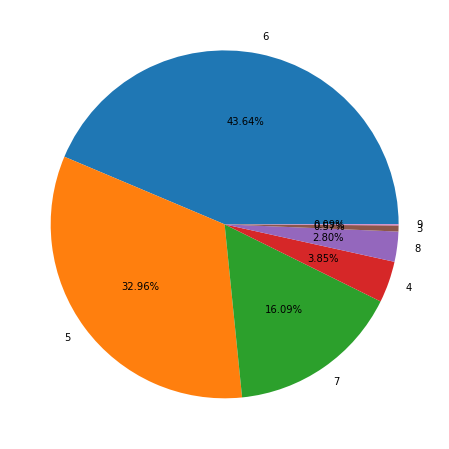

In [15]:
plt.figure(figsize=(10,8))
plt.pie(d1,labels=d1.index,autopct='%.2f%%')
plt.show()

In [16]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
print(type(x))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [17]:
print(x.shape)
print(y.shape)

(5295, 11)
(5295,)


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3971, 11)
(1324, 11)
(3971,)
(1324,)


In [21]:
def gen_cls_metrics(ytest,ypred):
    print('Accuracy Score',accuracy_score(ytest,ypred))
    cm=confusion_matrix(ytest,ypred)
    print(cm)
    print(classification_report(ytest,ypred,zero_division=0))

def train_test_score(model):
    print('Training Score',model.score(x_train,y_train))
    print('Testing Score',model.score(x_test,y_test))

#### SVM

In [22]:
m1=SVC(kernel='linear',C=1)
m1.fit(x_train,y_train)

SVC(C=1, kernel='linear')

In [23]:
train_test_score(m1)

Training Score 0.5373961218836565
Testing Score 0.5453172205438066


In [24]:
ypred_m1=m1.predict(x_test)
print(ypred_m1)

[6 6 5 ... 6 5 6]


In [25]:
print('Metrics for SVM Classifier')
gen_cls_metrics(y_test,ypred_m1)

Metrics for SVM Classifier
Accuracy Score 0.5453172205438066
[[  0   0   5   3   0   0]
 [  0   0  33  13   0   0]
 [  0   0 259 165   0   0]
 [  0   0 139 463   0   0]
 [  0   0  15 192   0   0]
 [  0   0   2  35   0   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00        46
           5       0.57      0.61      0.59       424
           6       0.53      0.77      0.63       602
           7       0.00      0.00      0.00       207
           8       0.00      0.00      0.00        37

    accuracy                           0.55      1324
   macro avg       0.18      0.23      0.20      1324
weighted avg       0.42      0.55      0.47      1324



#### Decision Tree

In [26]:
m2=DecisionTreeClassifier(criterion='gini',max_depth=7,min_samples_split=12)
m2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=7, min_samples_split=12)

In [27]:
train_test_score(m2)

Training Score 0.6376227650465878
Testing Score 0.5083081570996979


In [28]:
ypred_m2=m2.predict(x_test)
print(ypred_m2)

[6 5 5 ... 5 5 6]


In [29]:
print('Metrics for Decision Tree Classifier')
gen_cls_metrics(y_test,ypred_m2)

Metrics for Decision Tree Classifier
Accuracy Score 0.5083081570996979
[[  0   0   4   4   0   0]
 [  0   3  30  12   1   0]
 [  0   8 273 132  11   0]
 [  0   4 181 324  86   7]
 [  0   0  21 111  71   4]
 [  0   0   2  17  16   2]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         8
           4       0.20      0.07      0.10        46
           5       0.53      0.64      0.58       424
           6       0.54      0.54      0.54       602
           7       0.38      0.34      0.36       207
           8       0.15      0.05      0.08        37

    accuracy                           0.51      1324
   macro avg       0.30      0.27      0.28      1324
weighted avg       0.49      0.51      0.49      1324



#### Random Forest Classifier

In [30]:
m3=RandomForestClassifier(n_estimators=70,criterion='gini',max_depth=5)
m3.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=70)

In [31]:
train_test_score(m3)

Training Score 0.5794510198942332
Testing Score 0.5453172205438066


In [32]:
ypred_m3=m3.predict(x_test)
print(ypred_m3)

[6 6 5 ... 6 5 6]


In [33]:
print('Metrics for Random Forest Classifier')
gen_cls_metrics(y_test,ypred_m3)

Metrics for Random Forest Classifier
Accuracy Score 0.5453172205438066
[[  0   0   6   2   0   0]
 [  0   0  27  19   0   0]
 [  0   1 255 166   2   0]
 [  0   0 138 444  20   0]
 [  0   0   9 175  23   0]
 [  0   0   1  33   3   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00        46
           5       0.58      0.60      0.59       424
           6       0.53      0.74      0.62       602
           7       0.48      0.11      0.18       207
           8       0.00      0.00      0.00        37

    accuracy                           0.55      1324
   macro avg       0.27      0.24      0.23      1324
weighted avg       0.50      0.55      0.50      1324



#### Log Regression

In [34]:
m4=LogisticRegression(max_iter= 10000)
m4.fit(x_train,y_train)

c:\Users\aman0\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=10000)

In [35]:
train_test_score(m4)

Training Score 0.5472173256106774
Testing Score 0.5430513595166163


In [36]:
ypred_m4=m4.predict(x_test)
print(ypred_m4)

[7 6 5 ... 6 5 6]


In [37]:
print('Logistic Regression')
gen_cls_metrics(y_test,ypred_m4)

Logistic Regression
Accuracy Score 0.5430513595166163
[[  0   0   5   3   0   0]
 [  0   0  33  13   0   0]
 [  0   0 251 172   0   1]
 [  0   0 139 420  42   1]
 [  0   0  16 143  48   0]
 [  0   0   2  21  14   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00        46
           5       0.56      0.59      0.58       424
           6       0.54      0.70      0.61       602
           7       0.46      0.23      0.31       207
           8       0.00      0.00      0.00        37

    accuracy                           0.54      1324
   macro avg       0.26      0.25      0.25      1324
weighted avg       0.50      0.54      0.51      1324



#### KNN

In [38]:
m5=KNeighborsClassifier(n_neighbors=49)
m5.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=49)

In [39]:
train_test_score(m5)

Training Score 0.4769579451019894
Testing Score 0.46299093655589124


In [40]:
ypred_m5=m5.predict(x_test)
print(ypred_m5)

[6 6 6 ... 5 5 7]


In [41]:
print('KNN')
gen_cls_metrics(y_test,ypred_m5)

KNN
Accuracy Score 0.46299093655589124
[[  0   0   3   5   0   0]
 [  0   0  29  17   0   0]
 [  0   0 203 218   3   0]
 [  0   0 186 400  16   0]
 [  0   0  34 163  10   0]
 [  0   0   6  28   3   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00        46
           5       0.44      0.48      0.46       424
           6       0.48      0.66      0.56       602
           7       0.31      0.05      0.08       207
           8       0.00      0.00      0.00        37

    accuracy                           0.46      1324
   macro avg       0.21      0.20      0.18      1324
weighted avg       0.41      0.46      0.41      1324



### Naive Bayes

In [42]:
from sklearn.naive_bayes import GaussianNB

In [43]:
m6=GaussianNB()
m6.fit(x_train,y_train)

GaussianNB()

In [44]:
train_test_score(m6)

Training Score 0.45504910601863513
Testing Score 0.42900302114803623


In [45]:
ypred_m6=m6.predict(x_test)
print(ypred_m6)

[7 3 6 ... 6 6 7]


In [46]:
print('Naive Bayes')
gen_cls_metrics(y_test,ypred_m6)

Naive Bayes
Accuracy Score 0.42900302114803623
[[  1   2   3   2   0   0   0]
 [  2   4  22  13   4   1   0]
 [  3  32 207 151  31   0   0]
 [  3  26 158 237 176   1   1]
 [  0   7  22  57 118   1   2]
 [  0   1   4   6  25   1   0]
 [  0   0   0   0   0   0   0]]
              precision    recall  f1-score   support

           3       0.11      0.12      0.12         8
           4       0.06      0.09      0.07        46
           5       0.50      0.49      0.49       424
           6       0.51      0.39      0.44       602
           7       0.33      0.57      0.42       207
           8       0.25      0.03      0.05        37
           9       0.00      0.00      0.00         0

    accuracy                           0.43      1324
   macro avg       0.25      0.24      0.23      1324
weighted avg       0.45      0.43      0.43      1324

